In [18]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


In [2]:
!pip install optimizers

     |████████████████████████████████| 62 kB 676 kB/s 
  Created wheel for optimizers: filename=Optimizers-2.1-py3-none-any.whl size=2283 sha256=bf339af9470bc5606508a77c4237bf3879fff6795724d9ba4697eda5ac7f44e9
  Stored in directory: /root/.cache/pip/wheels/56/a5/4d/f679a391b5fca0b18c5e2fcd66ebff8900d97d6d95713915b9
Successfully built optimizers
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
train_Data = "/content/drive/MyDrive/train"
test_Data="/content/drive/MyDrive/val"

In [4]:
import matplotlib.pyplot as plt


In [5]:
def plotimages(images_arr):
  fig,axes = plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
tr_data_gen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest',

                             )

In [7]:
tr_data = tr_data_gen.flow_from_directory('/content/drive/MyDrive/train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='binary')

Found 1951 images belonging to 4 classes.


In [8]:
tr_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [9]:
te_data_gen=ImageDataGenerator(1./255)

In [10]:
te_data = te_data_gen.flow_from_directory("/content/drive/MyDrive/val",
                                       target_size=(150,150),
                                               batch_size=32,
                                               class_mode='binary')

Found 324 images belonging to 4 classes.


In [11]:
# images = [tr_data[0][0][0] for i in range(20)]
# plotimages(images)

In [12]:
m_path = '/content/drive/MyDrive/Model'
checkpoint = ModelCheckpoint(m_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
cllbacks_list = [checkpoint]

In [22]:
model = keras.Sequential([
                                    keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[150,150,3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128,kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256,kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=128,activation='relu'),
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256,activation='relu'),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=4,activation='softmax')
])

model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
history = model.fit(tr_data,
                    epochs=100,
                    verbose=1,
                    validation_data=te_data,
                    callbacks=cllbacks_list)

Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 1.2287 - accuracy: 0.4644 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: val_accuracy improved from -inf to 0.52778, saving model to /content/drive/MyDrive/Model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/assets
61/61 [==============================] - 1459s 24s/step - loss: 1.2287 - accuracy: 0.4644 - val_loss: 96.3283 - val_accuracy: 0.5278
Epoch 2/100
61/61 [==============================] - ETA: 0s - loss: 0.9545 - accuracy: 0.6161

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00002: val_accuracy improved from 0.52778 to 0.66667, saving model to /content/drive/MyDrive/Model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/assets
61/61 [==============================] - 32s 527ms/step - loss: 0.9545 - accuracy: 0.6161 - val_loss: 113.0496 - val_accuracy: 0.6667
Epoch 3/100
61/61 [==============================] - ETA: 0s - loss: 0.9199 - accuracy: 0.6279

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00003: val_accuracy did not improve from 0.66667
61/61 [==============================] - 30s 485ms/step - loss: 0.9199 - accuracy: 0.6279 - val_loss: 177.3313 - val_accuracy: 0.5463
Epoch 4/100
61/61 [==============================] - ETA: 0s - loss: 0.8873 - accuracy: 0.6627
Epoch 00004: val_accuracy improved from 0.66667 to 0.73765, saving model to /content/drive/MyDrive/Model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/assets
61/61 [==============================] - 32s 518ms/step - loss: 0.8873 - accuracy: 0.6627 - val_loss: 76.5972 - val_accuracy: 0.7377
Epoch 5/100
61/61 [==============================] - ETA: 0s - loss: 0.8000 - accuracy: 0.6955

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00005: val_accuracy did not improve from 0.73765
61/61 [==============================] - 30s 487ms/step - loss: 0.8000 - accuracy: 0.6955 - val_loss: 133.2202 - val_accuracy: 0.6265
Epoch 6/100
61/61 [==============================] - ETA: 0s - loss: 0.7529 - accuracy: 0.7089
Epoch 00006: val_accuracy did not improve from 0.73765
61/61 [==============================] - 29s 481ms/step - loss: 0.7529 - accuracy: 0.7089 - val_loss: 114.3456 - val_accuracy: 0.7284
Epoch 7/100
61/61 [==============================] - ETA: 0s - loss: 0.6849 - accuracy: 0.7396
Epoch 00007: val_accuracy did not improve from 0.73765
61/61 [==============================] - 32s 527ms/step - loss: 0.6849 - accuracy: 0.7396 - val_loss: 123.2492 - val_accuracy: 0.6821
Epoch 8/100
61/61 [==============================] - ETA: 0s - loss: 0.6116 - accuracy: 0.7509
Epoch 00008: val_accuracy improved from 0.73765 to 0.85185, saving model to /content/drive/MyDrive/Model
INFO:tensorflow:Assets written to: /conten

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00009: val_accuracy did not improve from 0.85185
61/61 [==============================] - 30s 496ms/step - loss: 0.5328 - accuracy: 0.7842 - val_loss: 77.3577 - val_accuracy: 0.7377
Epoch 10/100
61/61 [==============================] - ETA: 0s - loss: 0.5661 - accuracy: 0.7781
Epoch 00010: val_accuracy did not improve from 0.85185
61/61 [==============================] - 30s 493ms/step - loss: 0.5661 - accuracy: 0.7781 - val_loss: 31.7803 - val_accuracy: 0.8395
Epoch 11/100
61/61 [==============================] - ETA: 0s - loss: 0.5233 - accuracy: 0.8032
Epoch 00011: val_accuracy did not improve from 0.85185
61/61 [==============================] - 30s 485ms/step - loss: 0.5233 - accuracy: 0.8032 - val_loss: 51.9530 - val_accuracy: 0.8179
Epoch 12/100
61/61 [==============================] - ETA: 0s - loss: 0.4331 - accuracy: 0.8329
Epoch 00012: val_accuracy did not improve from 0.85185
61/61 [==============================] - 30s 485ms/step - loss: 0.4331 - accuracy: 0.8329 - 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00026: val_accuracy did not improve from 0.87654
61/61 [==============================] - 30s 493ms/step - loss: 0.2985 - accuracy: 0.8919 - val_loss: 249.8928 - val_accuracy: 0.6235
Epoch 27/100
61/61 [==============================] - ETA: 0s - loss: 0.3808 - accuracy: 0.8565
Epoch 00027: val_accuracy did not improve from 0.87654
61/61 [==============================] - 30s 488ms/step - loss: 0.3808 - accuracy: 0.8565 - val_loss: 174.7626 - val_accuracy: 0.6667
Epoch 28/100
61/61 [==============================] - ETA: 0s - loss: 0.3399 - accuracy: 0.8708
Epoch 00028: val_accuracy did not improve from 0.87654
61/61 [==============================] - 30s 490ms/step - loss: 0.3399 - accuracy: 0.8708 - val_loss: 57.8029 - val_accuracy: 0.8302
Epoch 29/100
61/61 [==============================] - ETA: 0s - loss: 0.2729 - accuracy: 0.9036
Epoch 00029: val_accuracy did not improve from 0.87654
61/61 [==============================] - 30s 487ms/step - loss: 0.2729 - accuracy: 0.9036 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00040: val_accuracy did not improve from 0.88889
61/61 [==============================] - 30s 494ms/step - loss: 0.2467 - accuracy: 0.9200 - val_loss: 209.9687 - val_accuracy: 0.6759
Epoch 41/100
61/61 [==============================] - ETA: 0s - loss: 0.1920 - accuracy: 0.9293
Epoch 00041: val_accuracy did not improve from 0.88889
61/61 [==============================] - 30s 488ms/step - loss: 0.1920 - accuracy: 0.9293 - val_loss: 194.5687 - val_accuracy: 0.7068
Epoch 42/100
61/61 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.9247
Epoch 00042: val_accuracy did not improve from 0.88889
61/61 [==============================] - 30s 488ms/step - loss: 0.2311 - accuracy: 0.9247 - val_loss: 484.3953 - val_accuracy: 0.5370
Epoch 43/100
61/61 [==============================] - ETA: 0s - loss: 0.2529 - accuracy: 0.9159
Epoch 00043: val_accuracy did not improve from 0.88889
61/61 [==============================] - 30s 488ms/step - loss: 0.2529 - accuracy: 0.9159

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00061: val_accuracy did not improve from 0.91358
61/61 [==============================] - 30s 487ms/step - loss: 0.2253 - accuracy: 0.9247 - val_loss: 216.2131 - val_accuracy: 0.6914
Epoch 62/100
61/61 [==============================] - ETA: 0s - loss: 0.2118 - accuracy: 0.9241
Epoch 00062: val_accuracy did not improve from 0.91358
61/61 [==============================] - 29s 483ms/step - loss: 0.2118 - accuracy: 0.9241 - val_loss: 164.6550 - val_accuracy: 0.7284
Epoch 63/100
61/61 [==============================] - ETA: 0s - loss: 0.1784 - accuracy: 0.9400
Epoch 00063: val_accuracy did not improve from 0.91358
61/61 [==============================] - 30s 486ms/step - loss: 0.1784 - accuracy: 0.9400 - val_loss: 251.7217 - val_accuracy: 0.7315
Epoch 64/100
61/61 [==============================] - ETA: 0s - loss: 0.2470 - accuracy: 0.9236
Epoch 00064: val_accuracy did not improve from 0.91358
61/61 [==============================] - 30s 491ms/step - loss: 0.2470 - accuracy: 0.9236

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00075: val_accuracy did not improve from 0.95062
61/61 [==============================] - 30s 497ms/step - loss: 0.1633 - accuracy: 0.9380 - val_loss: 77.0782 - val_accuracy: 0.8333
Epoch 76/100
61/61 [==============================] - ETA: 0s - loss: 0.1147 - accuracy: 0.9590
Epoch 00076: val_accuracy did not improve from 0.95062
61/61 [==============================] - 30s 490ms/step - loss: 0.1147 - accuracy: 0.9590 - val_loss: 76.0361 - val_accuracy: 0.8333
Epoch 77/100
61/61 [==============================] - ETA: 0s - loss: 0.1875 - accuracy: 0.9349
Epoch 00077: val_accuracy did not improve from 0.95062
61/61 [==============================] - 30s 487ms/step - loss: 0.1875 - accuracy: 0.9349 - val_loss: 72.9937 - val_accuracy: 0.8642
Epoch 78/100
61/61 [==============================] - ETA: 0s - loss: 0.1647 - accuracy: 0.9446
Epoch 00078: val_accuracy did not improve from 0.95062
61/61 [==============================] - 30s 491ms/step - loss: 0.1647 - accuracy: 0.9446 - 

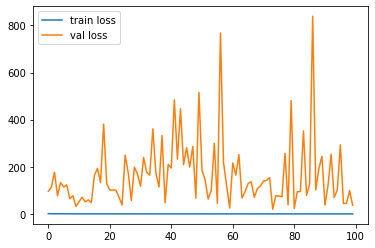

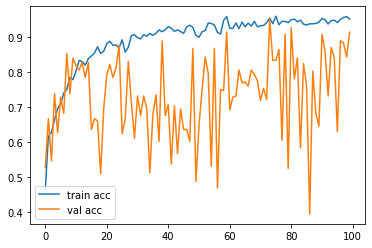

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [57]:
print(tf. __version__)

2.7.0
